In [1]:
import xgboost as xgb

In [2]:
# 加载训练集 和 测试集 数据
xgb_train = xgb.DMatrix('./agaricus.txt.train')
xgb_test  = xgb.DMatrix('./agaricus.txt.test')

In [3]:
# XGBoost常用参数配置
params = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "eta": 1.0,
    "gamma": 1.0,
    "min_child_weight": 1,
    "max_depth": 3
}

num_round = 2
watchlist = [(xgb_train, 'train'), (xgb_test, 'test')]

In [4]:
model = xgb.train(params, xgb_train, num_round, watchlist)

[0]	train-error:0.01454	test-error:0.01573
[1]	train-error:0.00857	test-error:0.01007


In [5]:
# 保存模型
print(type(model))

model.save_model("model.bin")

<class 'xgboost.core.Booster'>


In [6]:
# 加载模型
bst = xgb.Booster()

print(type(bst))

bst.load_model("model.bin")

<class 'xgboost.core.Booster'>


In [7]:
# 预测样本

pred = bst.predict(xgb_test)

print(pred)

[0.08756219 0.08756219 0.04343631 ... 0.9545     0.9472686  0.04343631]


In [8]:
# 打印出文本格式的模型（未做特征名称转换）
bst.dump_model("dump.raw.txt")
!cat dump.raw.txt

booster[0]:
0:[f29<-9.53674316e-07] yes=1,no=2,missing=1
	1:[f56<-9.53674316e-07] yes=3,no=4,missing=3
		3:[f60<-9.53674316e-07] yes=7,no=8,missing=7
			7:leaf=1.89703989
			8:leaf=-1.95061731
		4:[f21<-9.53674316e-07] yes=9,no=10,missing=9
			9:leaf=1.74193549
			10:leaf=-1.98029554
	2:[f109<-9.53674316e-07] yes=5,no=6,missing=5
		5:[f67<-9.53674316e-07] yes=11,no=12,missing=11
			11:leaf=-1.98688519
			12:leaf=1
		6:leaf=1.87301588
booster[1]:
0:[f29<-9.53674316e-07] yes=1,no=2,missing=1
	1:[f111<-9.53674316e-07] yes=3,no=4,missing=3
		3:[f21<-9.53674316e-07] yes=7,no=8,missing=7
			7:leaf=1.14643514
			8:leaf=-0.363475233
		4:leaf=-6.33612728
	2:[f109<-9.53674316e-07] yes=5,no=6,missing=5
		5:[f20<-9.53674316e-07] yes=9,no=10,missing=9
			9:leaf=-1.10516655
			10:leaf=1.1011765
		6:leaf=1.00597632


In [9]:
# 打印出文本格式的模型（已做特征名称转换）
bst.dump_model("dump.nice.txt", "featmap.txt")
!cat dump.nice.txt

booster[0]:
0:[odor=pungent] yes=2,no=1
1:[stalk-root=cup] yes=4,no=3
3:[stalk-root=missing] yes=8,no=7
			7:leaf=1.89703989
			8:leaf=-1.95061731
4:[bruises=no] yes=10,no=9
			9:leaf=1.74193549
			10:leaf=-1.98029554
2:[spore-print-color=orange] yes=6,no=5
5:[stalk-surface-below-ring=silky] yes=12,no=11
			11:leaf=-1.98688519
			12:leaf=1
		6:leaf=1.87301588
booster[1]:
0:[odor=pungent] yes=2,no=1
1:[spore-print-color=white] yes=4,no=3
3:[bruises=no] yes=8,no=7
			7:leaf=1.14643514
			8:leaf=-0.363475233
		4:leaf=-6.33612728
2:[spore-print-color=orange] yes=6,no=5
5:[bruises=bruises] yes=10,no=9
			9:leaf=-1.10516655
			10:leaf=1.1011765
		6:leaf=1.00597632


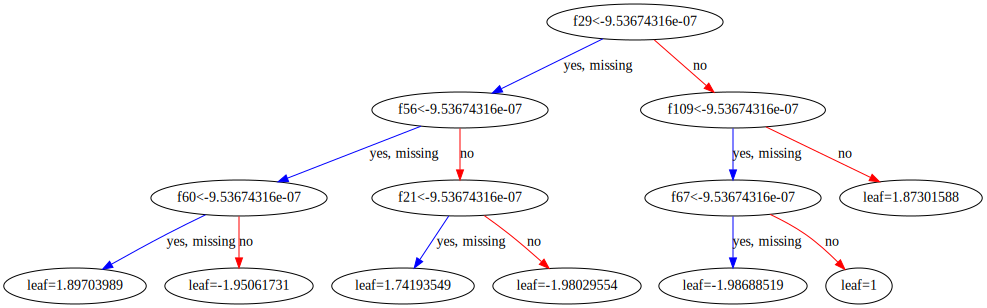

In [10]:
# 可视化第一棵树，未指定映射文件
xgb.to_graphviz(bst, num_trees = 0)

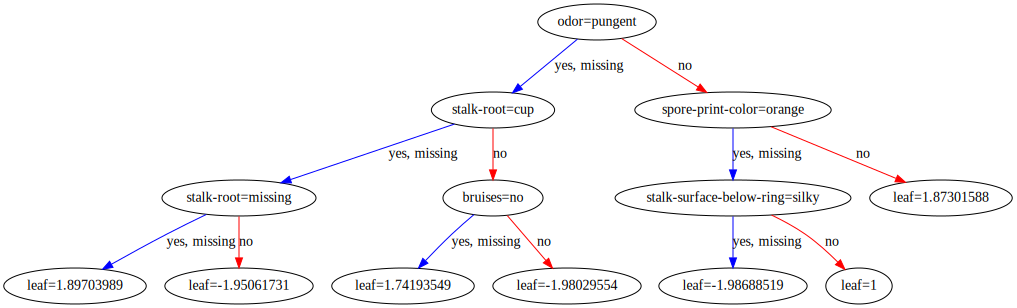

In [11]:
# 可视化第一棵树，指定映射文件
xgb.to_graphviz(bst, fmap = 'featmap.txt', num_trees = 0)